## 🔊 Acoustic Data

This notebook reads acoustic data in `.mp3` format from `data/audio/`, allows playback in-browser, and visualizes the waveform and spectrogram for each file.

Files processed:
- `mechanical.mp3`
- `car-engine-fail.mp3`
- `broken-engine.mp3`
- `lever-failure.mp3`
- `broken_device.mp3`
- `glitching-vocal-chop.mp3`

---

#### 📊 Understanding Acoustic Signal Visualizations

When analyzing acoustic signals (such as machine sounds or speech), two key visualizations help us understand their behavior:

##### 🟦 Waveform (Time-Domain Representation)

The **waveform** shows how the **amplitude (intensity)** of the sound changes over time.

- 📌 **X-axis**: Time (seconds)
- 📌 **Y-axis**: Amplitude (positive or negative pressure)
- ✅ Useful for identifying:
  - Transients (e.g., sudden bangs or faults)
  - Silence or steady-state operation
  - Signal duration and timing patterns

It’s essentially the raw shape of the sound wave.

---

##### 🖼️ Spectrogram (Time-Frequency Representation)

The **spectrogram** shows how the **frequency content** of the sound evolves over time.

- 📌 **X-axis**: Time (seconds)
- 📌 **Y-axis**: Frequency (Hz)
- 📌 **Color intensity**: Power or energy at a given frequency and time (dB scale)
- ✅ Useful for identifying:
  - Harmonics and pitch
  - Fault frequencies in mechanical systems
  - High-frequency anomalies like clicks or squeals

A spectrogram provides a much richer view of the sound’s structure and is critical in audio-based diagnostics.

---

In combination, waveform and spectrogram help you **hear and see** what’s happening inside your system or recording — especially useful in **predictive maintenance**, **fault detection**, and **audio classification** tasks.


In [1]:
# !pip install torchaudio matplotlib scipy --quiet

In [2]:
import os
import torch
import torchaudio
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np


### 🎧 Mechanical failure

<audio controls>
  <source src="data/audio/mechanical.mp3" type="audio/mpeg">
  Your browser does not support the audio element.
</audio>

📁 File: data/audio/mechanical.mp3
📏 Duration: 48.77 s
🔢 Sample Rate: 24000 Hz
🔁 Samples: 1170432
🔊 Max Amplitude: 0.368
🔉 Min Amplitude: -0.384
📈 Mean Amplitude: 0.000
📊 Std Deviation: 0.050


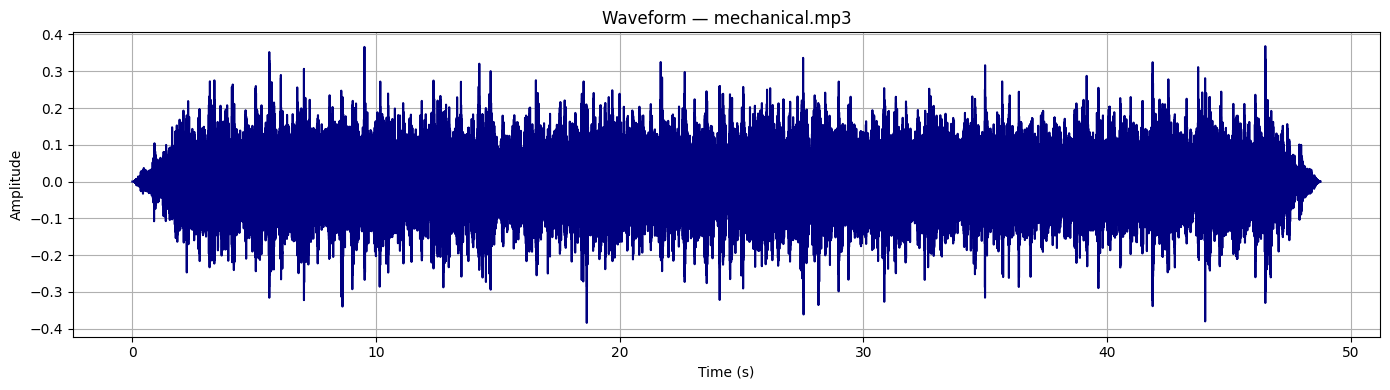

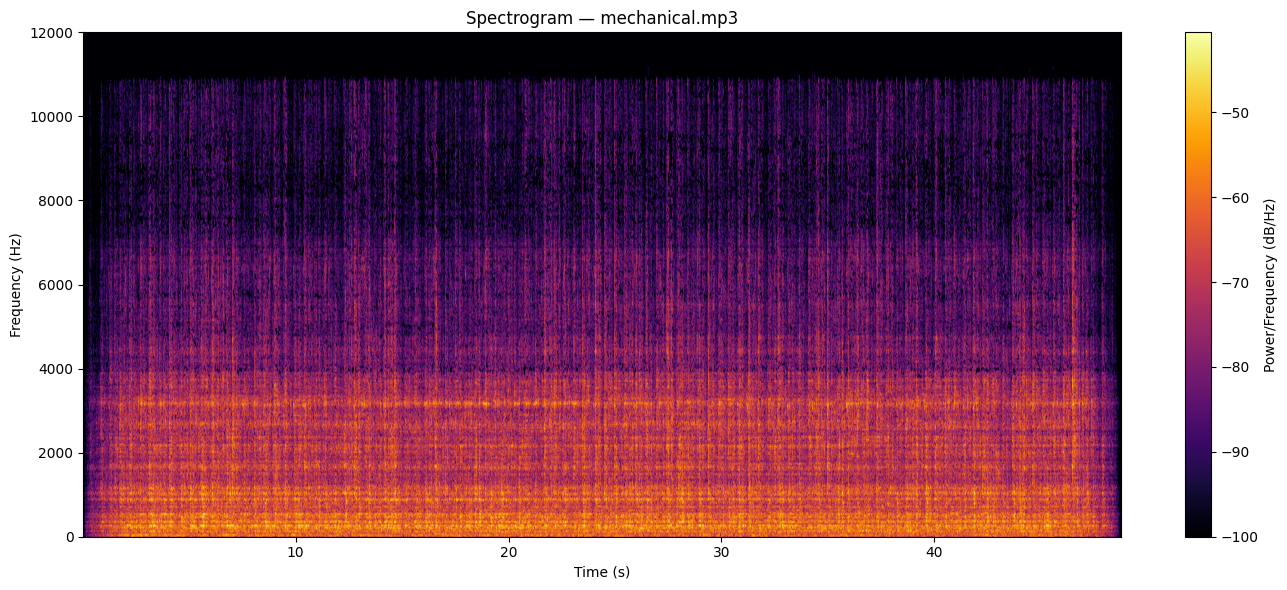

In [3]:
# Load and visualize mechanical.mp3
file_path = "data/audio/mechanical.mp3"
waveform, sr = torchaudio.load(file_path)
waveform = waveform.mean(dim=0)  # Convert to mono if stereo
samples = waveform.numpy()
duration = len(samples) / sr
t = np.linspace(0, duration, len(samples), endpoint=False)

# Descriptive stats
print("📁 File:", file_path)
print(f"📏 Duration: {duration:.2f} s")
print(f"🔢 Sample Rate: {sr} Hz")
print(f"🔁 Samples: {len(samples)}")
print(f"🔊 Max Amplitude: {samples.max():.3f}")
print(f"🔉 Min Amplitude: {samples.min():.3f}")
print(f"📈 Mean Amplitude: {samples.mean():.3f}")
print(f"📊 Std Deviation: {samples.std():.3f}")

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(t, samples, color='navy')
plt.title("Waveform — mechanical.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot spectrogram
f, ts, Sxx = spectrogram(samples, fs=sr, window='hann', nperseg=1024, noverlap=512)
plt.figure(figsize=(14, 6))
plt.pcolormesh(ts, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
plt.title("Spectrogram — mechanical.mp3")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.ylim(0, sr / 2)
plt.tight_layout()
plt.show()

### 🎧 Car Engine Failure

<audio controls>
  <source src="data/audio/car-engine-fail.mp3" type="audio/mpeg">
  Your browser does not support the audio element.
</audio>

📁 File: data/audio/car-engine-fail.mp3
📏 Duration: 3.08 s
🔢 Sample Rate: 44100 Hz
🔁 Samples: 135936
🔊 Max Amplitude: 0.775
🔉 Min Amplitude: -0.706
📈 Mean Amplitude: -0.000
📊 Std Deviation: 0.100


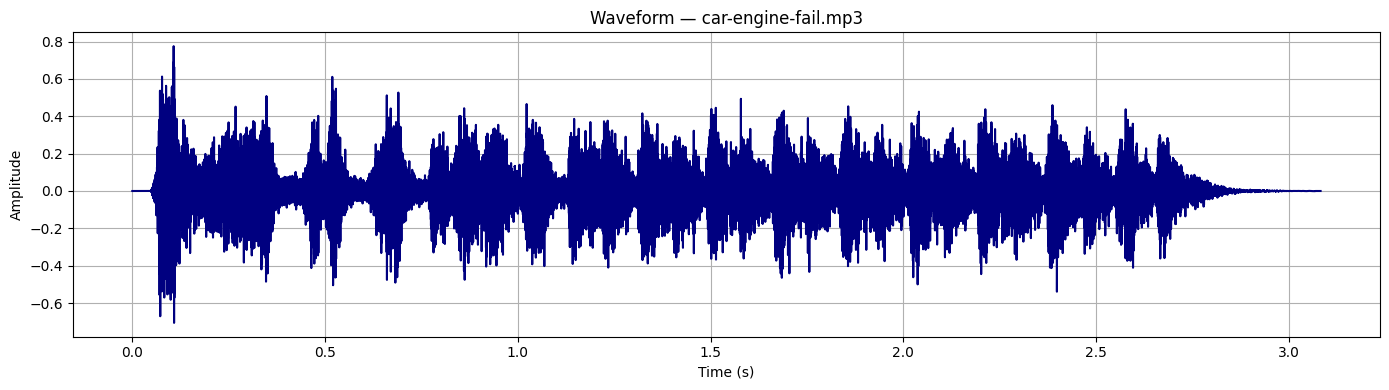

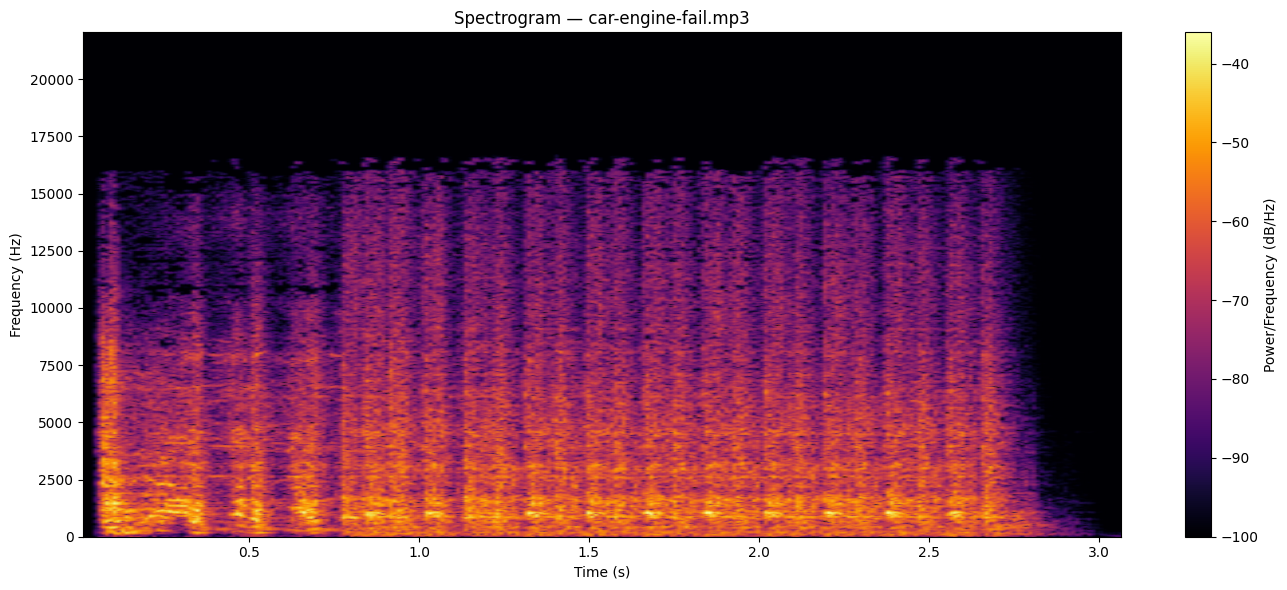

In [4]:
# Load and visualize car-engine-fail.mp3
file_path = "data/audio/car-engine-fail.mp3"
waveform, sr = torchaudio.load(file_path)
waveform = waveform.mean(dim=0)  # Convert to mono if stereo
samples = waveform.numpy()
duration = len(samples) / sr
t = np.linspace(0, duration, len(samples), endpoint=False)

# Descriptive stats
print("📁 File:", file_path)
print(f"📏 Duration: {duration:.2f} s")
print(f"🔢 Sample Rate: {sr} Hz")
print(f"🔁 Samples: {len(samples)}")
print(f"🔊 Max Amplitude: {samples.max():.3f}")
print(f"🔉 Min Amplitude: {samples.min():.3f}")
print(f"📈 Mean Amplitude: {samples.mean():.3f}")
print(f"📊 Std Deviation: {samples.std():.3f}")

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(t, samples, color='navy')
plt.title("Waveform — car-engine-fail.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot spectrogram
f, ts, Sxx = spectrogram(samples, fs=sr, window='hann', nperseg=1024, noverlap=512)
plt.figure(figsize=(14, 6))
plt.pcolormesh(ts, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
plt.title("Spectrogram — car-engine-fail.mp3")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.ylim(0, sr / 2)
plt.tight_layout()
plt.show()

### 🎧 Broken Engine

<audio controls>
  <source src="data/audio/broken-engine.mp3" type="audio/mpeg">
  Your browser does not support the audio element.
</audio>

📁 File: data/audio/broken-engine.mp3
📏 Duration: 12.67 s
🔢 Sample Rate: 48000 Hz
🔁 Samples: 608256
🔊 Max Amplitude: 0.601
🔉 Min Amplitude: -0.481
📈 Mean Amplitude: 0.000
📊 Std Deviation: 0.065


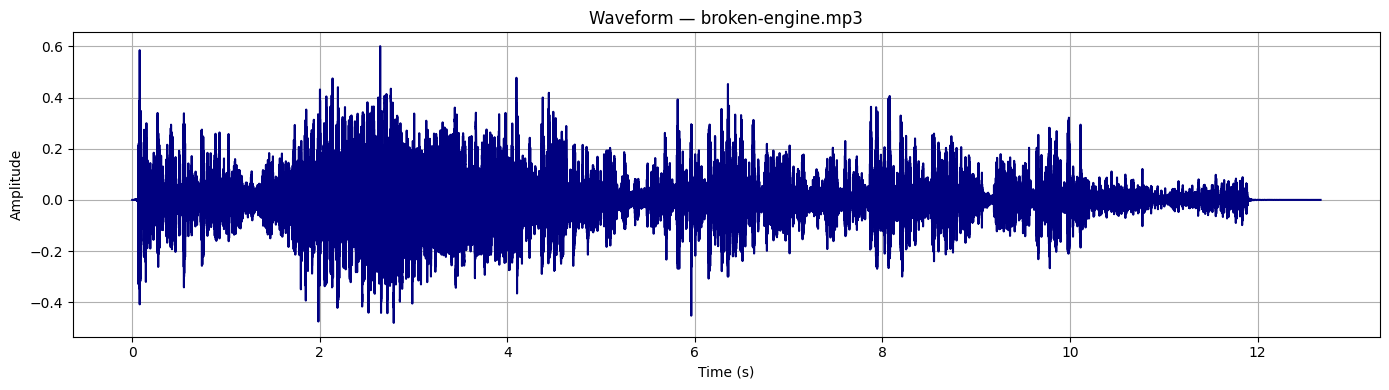

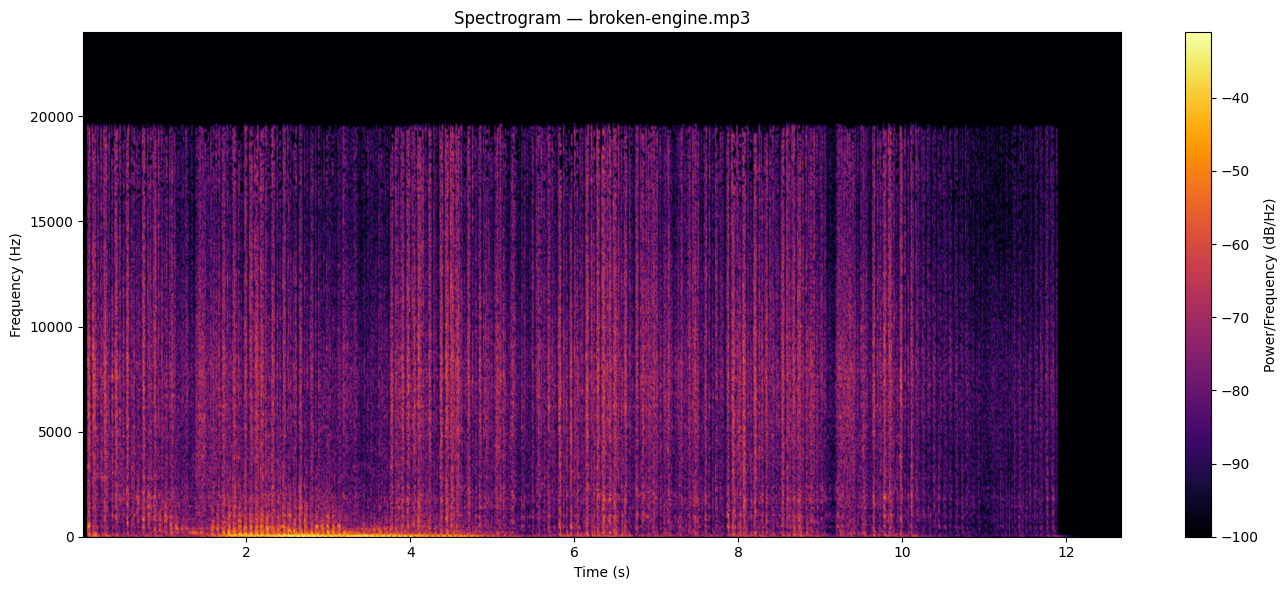

In [5]:
# Load and visualize broken-engine.mp3
file_path = "data/audio/broken-engine.mp3"
waveform, sr = torchaudio.load(file_path)
waveform = waveform.mean(dim=0)  # Convert to mono if stereo
samples = waveform.numpy()
duration = len(samples) / sr
t = np.linspace(0, duration, len(samples), endpoint=False)

# Descriptive stats
print("📁 File:", file_path)
print(f"📏 Duration: {duration:.2f} s")
print(f"🔢 Sample Rate: {sr} Hz")
print(f"🔁 Samples: {len(samples)}")
print(f"🔊 Max Amplitude: {samples.max():.3f}")
print(f"🔉 Min Amplitude: {samples.min():.3f}")
print(f"📈 Mean Amplitude: {samples.mean():.3f}")
print(f"📊 Std Deviation: {samples.std():.3f}")

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(t, samples, color='navy')
plt.title("Waveform — broken-engine.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot spectrogram
f, ts, Sxx = spectrogram(samples, fs=sr, window='hann', nperseg=1024, noverlap=512)
plt.figure(figsize=(14, 6))
plt.pcolormesh(ts, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
plt.title("Spectrogram — broken-engine.mp3")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.ylim(0, sr / 2)
plt.tight_layout()
plt.show()

### 🎧 Lever Failure

<audio controls>
  <source src="data/audio/lever-failure.mp3" type="audio/mpeg">
  Your browser does not support the audio element.
</audio>

📁 File: data/audio/lever-failure.mp3
📏 Duration: 64.03 s
🔢 Sample Rate: 48000 Hz
🔁 Samples: 3073536
🔊 Max Amplitude: 0.762
🔉 Min Amplitude: -0.792
📈 Mean Amplitude: -0.000
📊 Std Deviation: 0.053


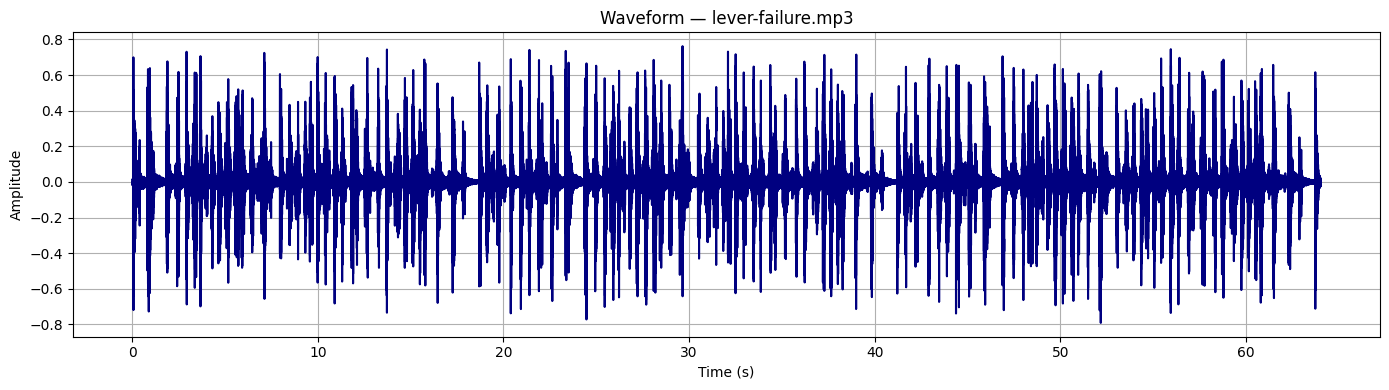

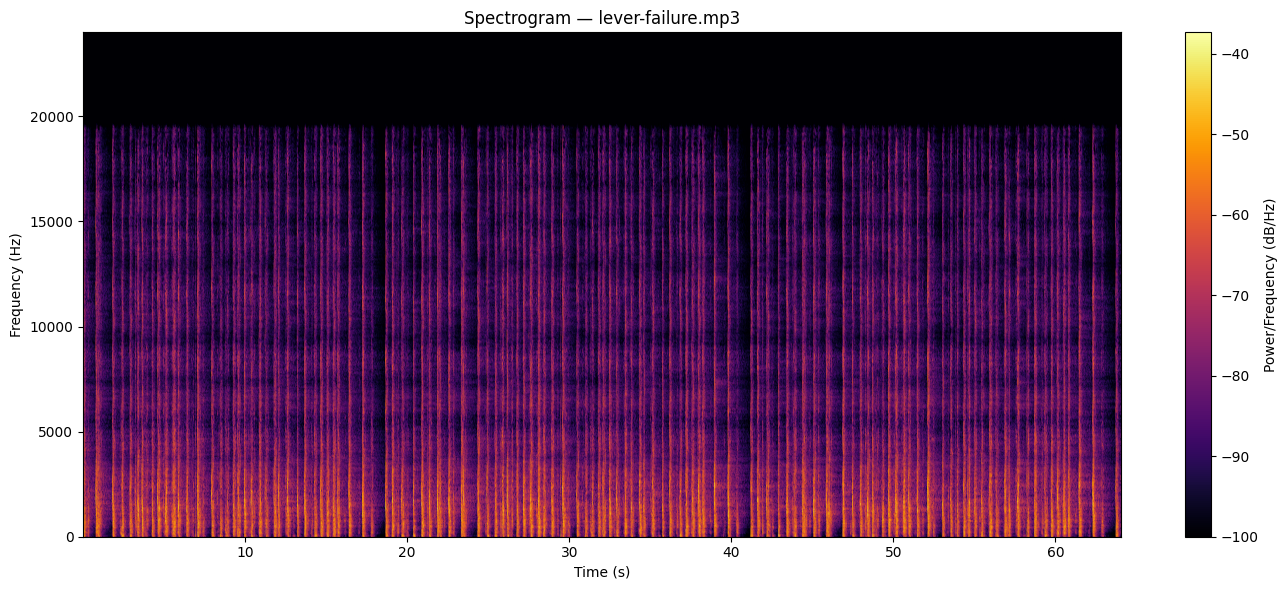

In [6]:
# Load and visualize lever-failure.mp3
file_path = "data/audio/lever-failure.mp3"
waveform, sr = torchaudio.load(file_path)
waveform = waveform.mean(dim=0)  # Convert to mono if stereo
samples = waveform.numpy()
duration = len(samples) / sr
t = np.linspace(0, duration, len(samples), endpoint=False)

# Descriptive stats
print("📁 File:", file_path)
print(f"📏 Duration: {duration:.2f} s")
print(f"🔢 Sample Rate: {sr} Hz")
print(f"🔁 Samples: {len(samples)}")
print(f"🔊 Max Amplitude: {samples.max():.3f}")
print(f"🔉 Min Amplitude: {samples.min():.3f}")
print(f"📈 Mean Amplitude: {samples.mean():.3f}")
print(f"📊 Std Deviation: {samples.std():.3f}")

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(t, samples, color='navy')
plt.title("Waveform — lever-failure.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot spectrogram
f, ts, Sxx = spectrogram(samples, fs=sr, window='hann', nperseg=1024, noverlap=512)
plt.figure(figsize=(14, 6))
plt.pcolormesh(ts, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
plt.title("Spectrogram — lever-failure.mp3")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.ylim(0, sr / 2)
plt.tight_layout()
plt.show()

### 🎧 Broken Device

<audio controls>
  <source src="data/audio/broken_device.mp3" type="audio/mpeg">
  Your browser does not support the audio element.
</audio>

📁 File: data/audio/broken_device.mp3
📏 Duration: 2.90 s
🔢 Sample Rate: 24000 Hz
🔁 Samples: 69696
🔊 Max Amplitude: 0.626
🔉 Min Amplitude: -0.718
📈 Mean Amplitude: 0.000
📊 Std Deviation: 0.087


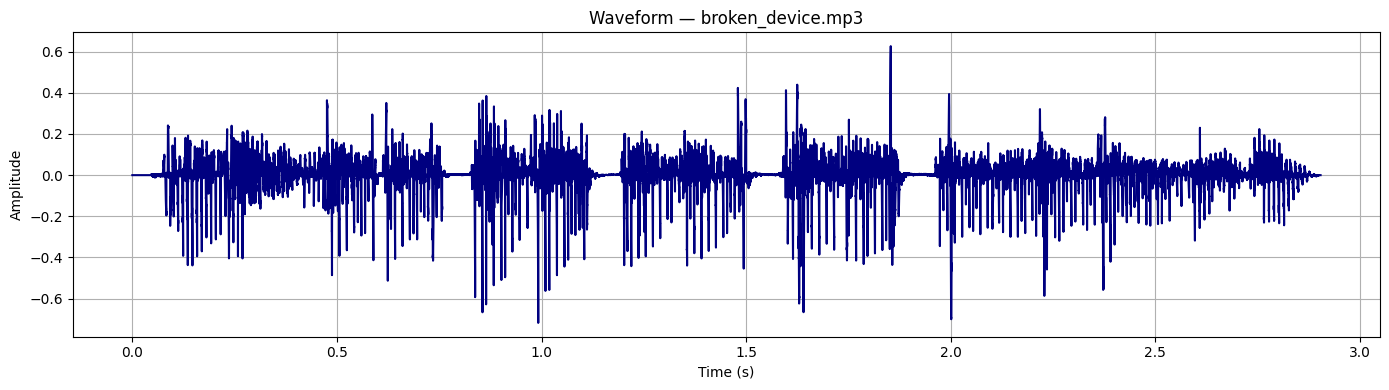

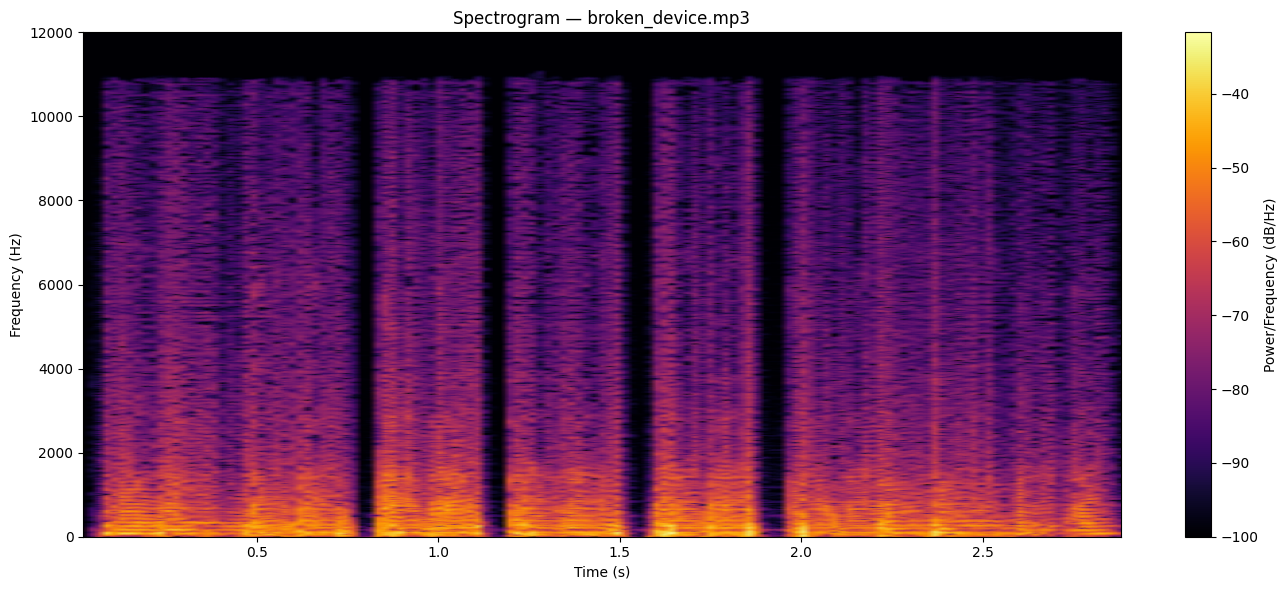

In [7]:
# Load and visualize broken_device.mp3
file_path = "data/audio/broken_device.mp3"
waveform, sr = torchaudio.load(file_path)
waveform = waveform.mean(dim=0)  # Convert to mono if stereo
samples = waveform.numpy()
duration = len(samples) / sr
t = np.linspace(0, duration, len(samples), endpoint=False)

# Descriptive stats
print("📁 File:", file_path)
print(f"📏 Duration: {duration:.2f} s")
print(f"🔢 Sample Rate: {sr} Hz")
print(f"🔁 Samples: {len(samples)}")
print(f"🔊 Max Amplitude: {samples.max():.3f}")
print(f"🔉 Min Amplitude: {samples.min():.3f}")
print(f"📈 Mean Amplitude: {samples.mean():.3f}")
print(f"📊 Std Deviation: {samples.std():.3f}")

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(t, samples, color='navy')
plt.title("Waveform — broken_device.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot spectrogram
f, ts, Sxx = spectrogram(samples, fs=sr, window='hann', nperseg=1024, noverlap=512)
plt.figure(figsize=(14, 6))
plt.pcolormesh(ts, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
plt.title("Spectrogram — broken_device.mp3")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.ylim(0, sr / 2)
plt.tight_layout()
plt.show()

### 🎧 Glitching Vocal Chop

<audio controls>
  <source src="data/audio/glitching-vocal-chop.mp3" type="audio/mpeg">
  Your browser does not support the audio element.
</audio>

📁 File: data/audio/glitching-vocal-chop.mp3
📏 Duration: 1.58 s
🔢 Sample Rate: 24000 Hz
🔁 Samples: 38016
🔊 Max Amplitude: 0.376
🔉 Min Amplitude: -0.358
📈 Mean Amplitude: 0.000
📊 Std Deviation: 0.064


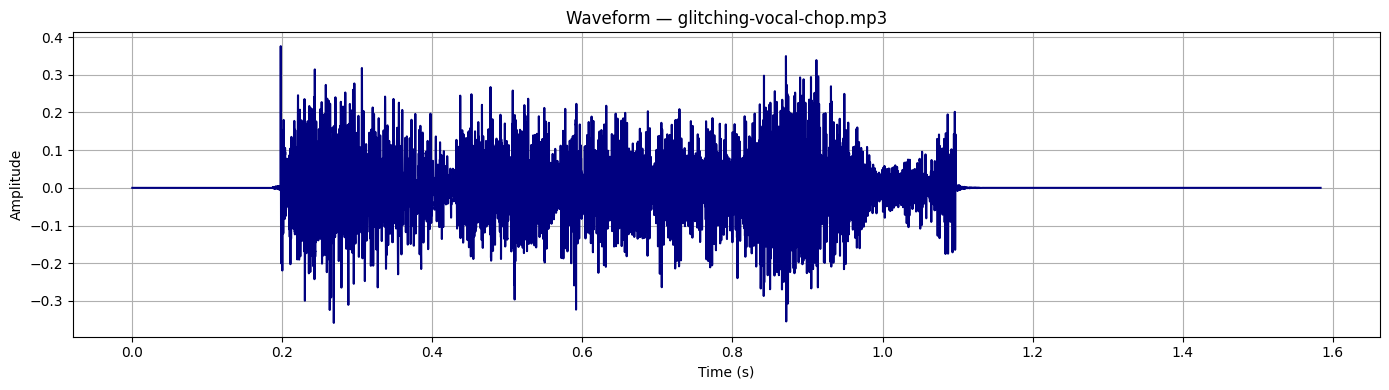

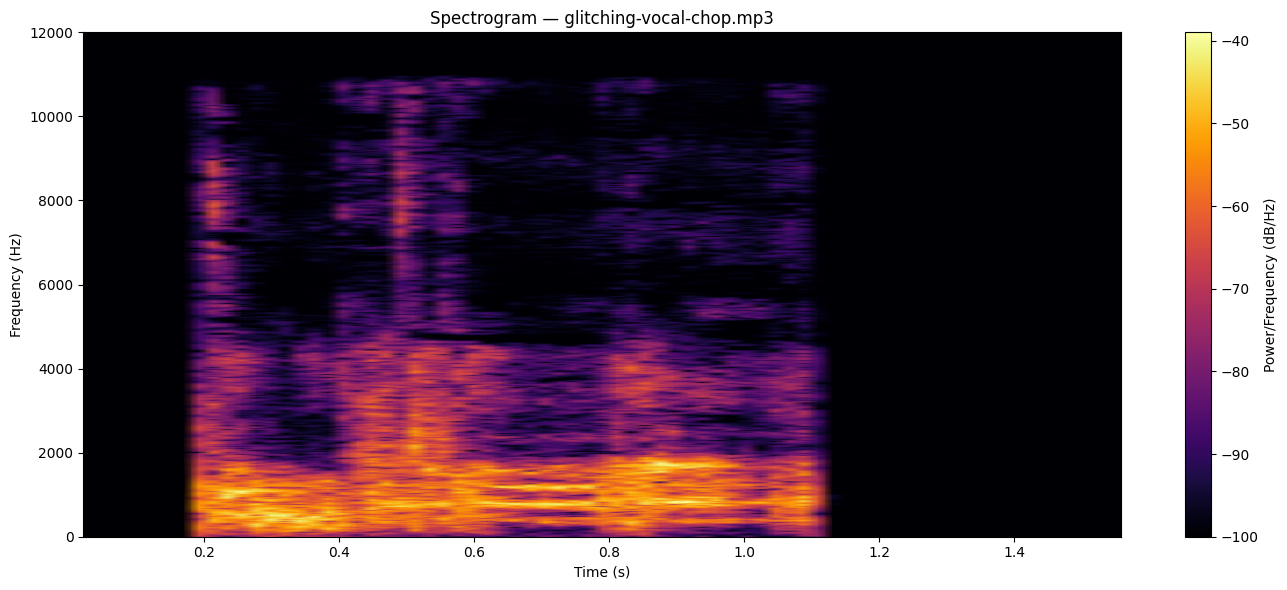

In [8]:
# Load and visualize glitching-vocal-chop.mp3
file_path = "data/audio/glitching-vocal-chop.mp3"
waveform, sr = torchaudio.load(file_path)
waveform = waveform.mean(dim=0)  # Convert to mono if stereo
samples = waveform.numpy()
duration = len(samples) / sr
t = np.linspace(0, duration, len(samples), endpoint=False)

# Descriptive stats
print("📁 File:", file_path)
print(f"📏 Duration: {duration:.2f} s")
print(f"🔢 Sample Rate: {sr} Hz")
print(f"🔁 Samples: {len(samples)}")
print(f"🔊 Max Amplitude: {samples.max():.3f}")
print(f"🔉 Min Amplitude: {samples.min():.3f}")
print(f"📈 Mean Amplitude: {samples.mean():.3f}")
print(f"📊 Std Deviation: {samples.std():.3f}")

# Plot waveform
plt.figure(figsize=(14, 4))
plt.plot(t, samples, color='navy')
plt.title("Waveform — glitching-vocal-chop.mp3")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot spectrogram
f, ts, Sxx = spectrogram(samples, fs=sr, window='hann', nperseg=1024, noverlap=512)
plt.figure(figsize=(14, 6))
plt.pcolormesh(ts, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='inferno')
plt.title("Spectrogram — glitching-vocal-chop.mp3")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Power/Frequency (dB/Hz)")
plt.ylim(0, sr / 2)
plt.tight_layout()
plt.show()